### Exploring E-Commerce Dataset
<i>To Understand User Journey and Interction with Disctinct Brands and Products</i>

The first checkpoint of any analysis is going ahead and shaking hands with the data. Since we were dealing with an unstructured problem here and were completely unaware of how the data has been sourced, it was key for us to do a broad as well as a deep level by level analysis of the data. Let’d go ahead and dive deeper!

Our selected datasets give us information on the overall activity indicated by view, cart and purchase actions of users across time, products, brands, as well as price. 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/kaggle/input/ecommerce-events-history-in-electronics-store/events.csv")

In [6]:
data.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy


In [7]:
data.shape

(885129, 9)

In [8]:
temp = data.isna().sum()/885129
temp[temp>0]

category_code    0.266875
brand            0.239924
user_session     0.000186
dtype: float64

In [9]:
data.nunique().sort_values()

event_type            3
category_code       107
category_id         718
brand               999
price             12422
product_id        53453
user_id          407283
user_session     490398
event_time       845041
dtype: int64

<b> Identifying user interaction behavior with the platform:</b>

In [10]:
(data['event_type'] == "purchase").sum(), (data['event_type'] == "view").sum(),  (data['event_type'] == "cart").sum()

(37346, 793748, 54035)

In [11]:
data[['event_type', 'user_id']].drop_duplicates().groupby(['event_type']).count()

,user_id
event_type,
cart,36952
purchase,21304
view,406863


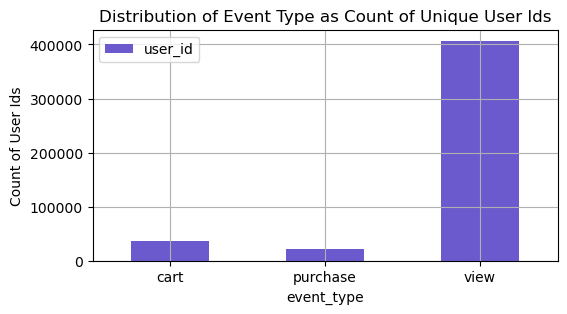

In [12]:
temp = data[['event_type', 'user_id']].drop_duplicates().groupby(['event_type']).count()
ax = temp.plot(kind = "bar", figsize = (6, 3), rot = 0, title = "Distribution of Event Type as Count of Unique User Ids", grid = True, 
              ylabel = 'Count of User Ids', color = "slateblue")

In [13]:
k = (data['event_type'] == "purchase").sum() + (data['event_type'] == "view").sum() +  (data['event_type'] == "cart").sum()
100*(data['event_type'] == "purchase").sum()/k, 100*(data['event_type'] == "view").sum()/k,  100*(data['event_type'] == "cart").sum()/k

(4.2192719931219065, 89.67596813571807, 6.104759871160023)

If we look at the plots here, not surprisingly, one would expect views to be much higher than actual purchases, and here we can observe a high disparity giving us a key signal to look at purchased products as a specialized segment. This gives us a direction towards trying to uncover the difference between what is viewed vs what is selected to be a part of the cart and then what makes it to the receipt. 

<b>Splitting the condensed date variable:</b>

In [14]:
type(data['event_time'][0]), data['event_time'][0]

(str, '2020-09-24 11:57:06 UTC')

In [15]:
# number of products over time
def extract_year(str_in):
    return int(str_in[:4])

extract_year(data['event_time'][0]), type(extract_year(data['event_time'][0]))

(2020, int)

In [16]:
def extract_month(str_in):
    return int(str_in[5:7])

extract_month(data['event_time'][0]), type(extract_month(data['event_time'][0]))

(9, int)

In [17]:
def extract_tz(str_in):
    return str_in[-3:]

extract_tz(data['event_time'][0]), type(extract_tz(data['event_time'][0]))

('UTC', str)

In [18]:
def clean_date(str_in):
    return str_in[:10]

clean_date(data['event_time'][0]), type(clean_date(data['event_time'][0]))

('2020-09-24', str)

In [19]:
def year_month(str_in):
    return str_in[:7]

year_month(data['event_time'][0]), type(year_month(data['event_time'][0]))

('2020-09', str)

In [20]:
data['event_time']

0         2020-09-24 11:57:06 UTC
1         2020-09-24 11:57:26 UTC
2         2020-09-24 11:57:27 UTC
3         2020-09-24 11:57:33 UTC
4         2020-09-24 11:57:36 UTC
                   ...           
885124    2021-02-28 23:55:01 UTC
885125    2021-02-28 23:58:05 UTC
885126    2021-02-28 23:58:09 UTC
885127    2021-02-28 23:58:14 UTC
885128    2021-02-28 23:59:09 UTC
Name: event_time, Length: 885129, dtype: object

In [21]:
data['timezone'] = data['event_time'].apply(extract_tz)
data['month'] = data['event_time'].apply(extract_month)
data['year'] = data['event_time'].apply(extract_year)
data['date'] = data['event_time'].apply(clean_date) # it's string not datetime, can convert if needed
data['year_month'] = data['event_time'].apply(year_month)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,UTC,9,2020,2020-09-24,2020-09
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,UTC,9,2020,2020-09-24,2020-09
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,UTC,9,2020,2020-09-24,2020-09
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,UTC,9,2020,2020-09-24,2020-09
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,UTC,9,2020,2020-09-24,2020-09


In [22]:
data['date'][0], data['date'][885128]             # date starts at 24th September and goes up to Feb 28 

('2020-09-24', '2021-02-28')

In [23]:
data['year'].unique(), data['month'].unique(), data['year_month'].unique(), data['timezone'].unique()

(array([2020, 2021]),
 array([ 9, 10, 11, 12,  1,  2]),
 array(['2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02'],
       dtype=object),
 array(['UTC'], dtype=object))

<b>Net activity over time:</b>

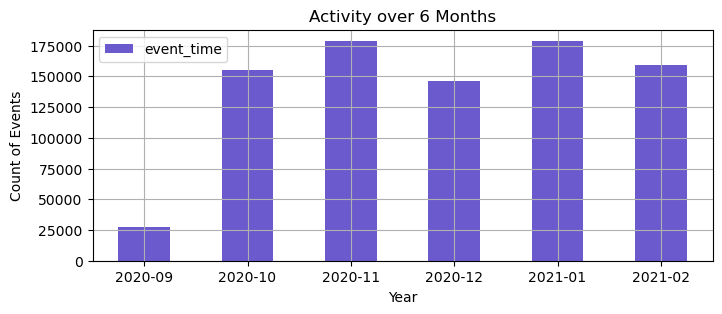

In [24]:
temp = data[['event_time', 'year_month']].drop_duplicates().groupby(['year_month']).count()
ax = temp.plot(kind = "bar", figsize = (8, 3), rot = 0, title = "Activity over 6 Months", grid = True, 
              ylabel = 'Count of Events', xlabel = 'Year', color = "slateblue")

In [25]:
temp

,event_time
year_month,
2020-09,27059
2020-10,154758
2020-11,178957
2020-12,146462
2021-01,178730
2021-02,159075


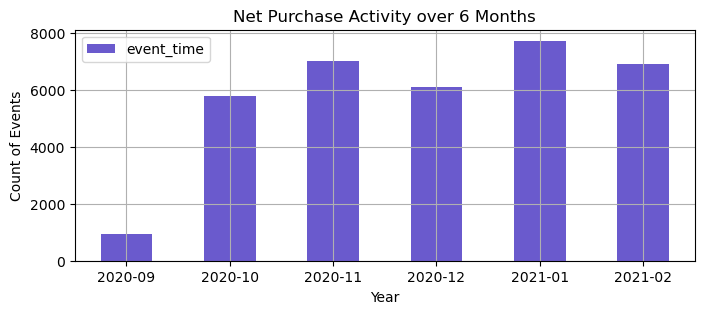

In [26]:
temp = data[data['event_type']=='purchase'][['event_time', 'year_month']].drop_duplicates().groupby(['year_month']).count()
ax = temp.plot(kind = "bar", figsize = (8, 3), rot = 0, title = "Net Purchase Activity over 6 Months", grid = True, 
              ylabel = 'Count of Events', xlabel = 'Year', color = "slateblue")

In [27]:
temp

,event_time
year_month,
2020-09,928
2020-10,5784
2020-11,6996
2020-12,6092
2021-01,7725
2021-02,6898


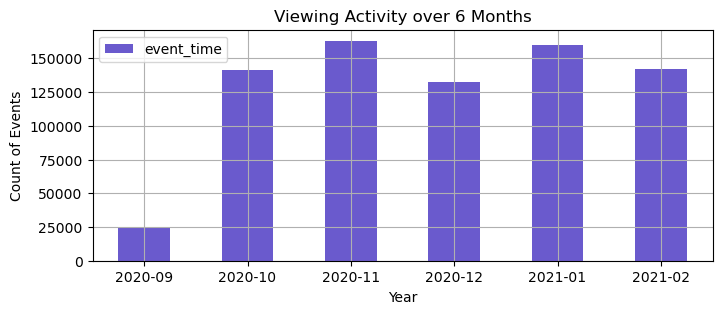

In [28]:
temp = data[data['event_type']=='view'][['event_time', 'year_month']].drop_duplicates().groupby(['year_month']).count()
ax = temp.plot(kind = "bar", figsize = (8, 3), rot = 0, title = "Viewing Activity over 6 Months", grid = True, 
              ylabel = 'Count of Events', xlabel = 'Year', color = "slateblue")

In [29]:
temp

,event_time
year_month,
2020-09,24864
2020-10,141267
2020-11,163019
2020-12,132090
2021-01,159883
2021-02,142140


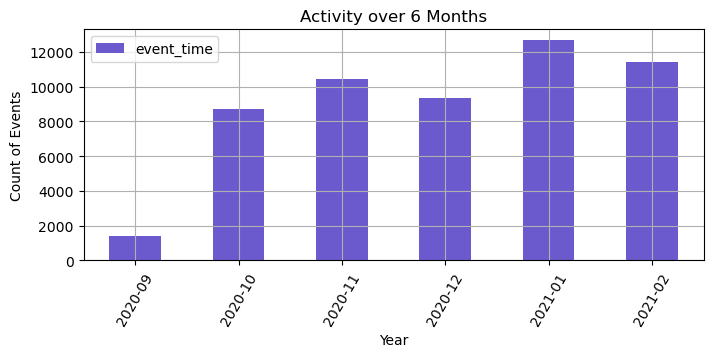

In [30]:
temp = data[data['event_type']=='cart'][['event_time', 'year_month']].drop_duplicates().groupby(['year_month']).count()
ax = temp.plot(kind = "bar", figsize = (8, 3), rot = 60, title = "Activity over 6 Months", grid = True, 
              ylabel = 'Count of Events', xlabel = 'Year', color = "slateblue")

<b>Looking at Price Variations, if any:</b>

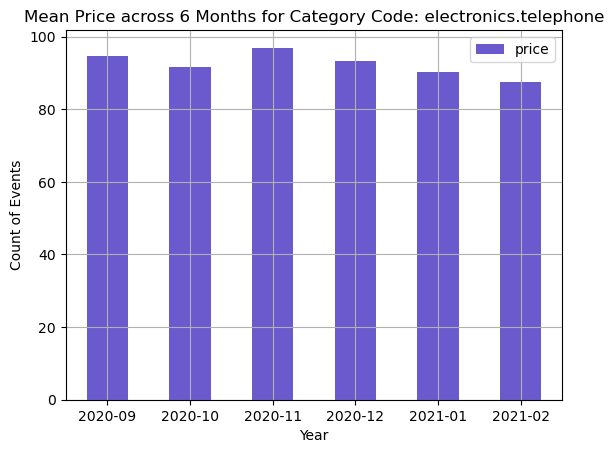

In [31]:
temp = data[data['category_code']=='electronics.telephone'][['price', 'year_month']].drop_duplicates().groupby(['year_month']).mean()
ax = temp.plot(kind = "bar", rot = 0, title = "Mean Price across 6 Months for Category Code: electronics.telephone", grid = True, 
              ylabel = 'Count of Events', xlabel = 'Year', color = "slateblue")

In [32]:
temp

,price
year_month,
2020-09,94.683916
2020-10,91.638298
2020-11,96.949962
2020-12,93.251484
2021-01,90.128039
2021-02,87.641849


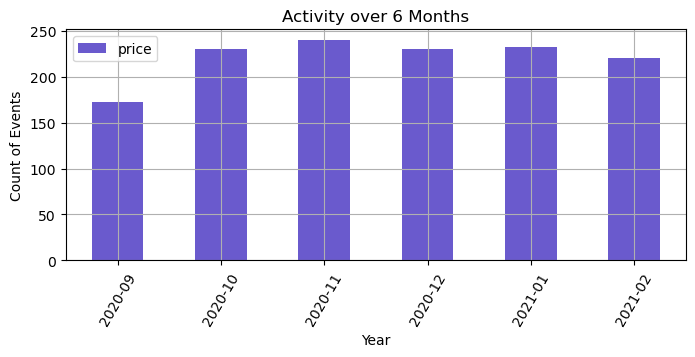

In [33]:
temp = data[['price', 'year_month']].drop_duplicates().groupby(['year_month']).mean()
ax = temp.plot(kind = "bar", figsize = (8, 3), rot = 60, title = "Activity over 6 Months", grid = True, 
              ylabel = 'Count of Events', xlabel = 'Year', color = "slateblue")

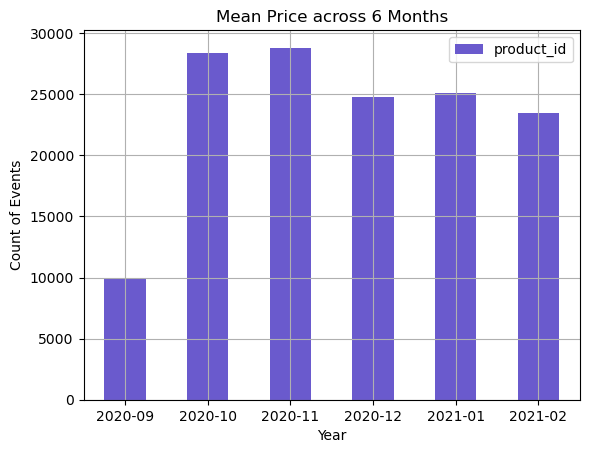

In [34]:
temp = data[['product_id', 'year_month']].drop_duplicates().groupby(['year_month']).count()
ax = temp.plot(kind = "bar", rot = 0, title = "Mean Price across 6 Months", grid = True, 
              ylabel = 'Count of Events', xlabel = 'Year', color = "slateblue")

<b>Quick check for brand: Gigabyte</b>

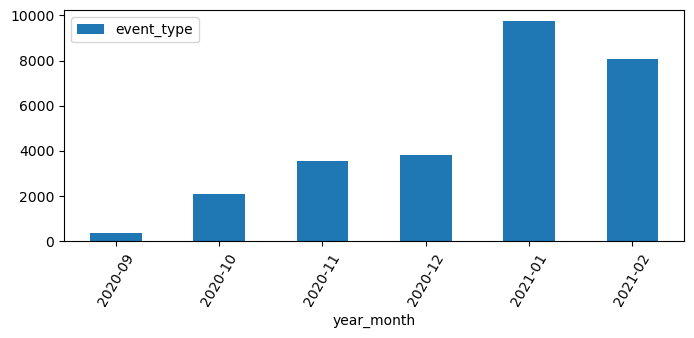

In [35]:
temp = data[data['brand']=="gigabyte"][['event_type', 'year_month']].groupby(['year_month']).count()
ax = temp.plot(kind = "bar", figsize = (8, 3), rot = 60) 

<b>Quick check for brand: Asus</b>

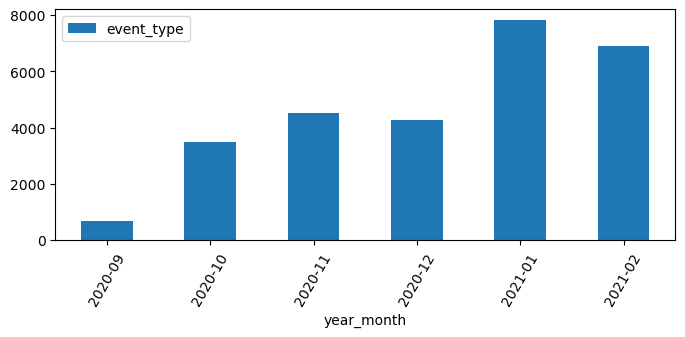

In [36]:
temp = data[data['brand']=="asus"][['event_type', 'year_month']].groupby(['year_month']).count()
ax = temp.plot(kind = "bar", figsize = (8, 3), rot = 60) 

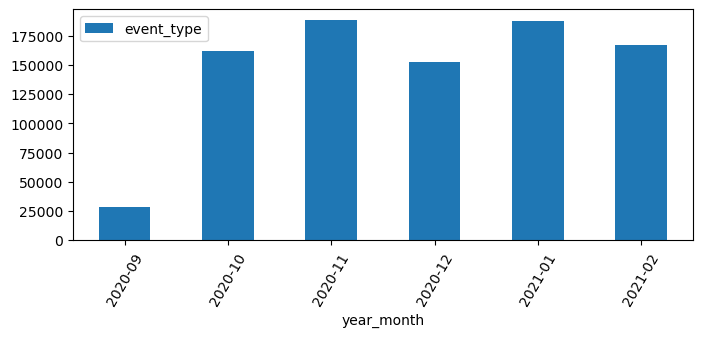

In [37]:
temp = data[['event_type', 'year_month']].groupby(['year_month']).count()
ax = temp.plot(kind = "bar", figsize = (8, 3), rot = 60) 

<b>Quick check for brand: Microsoft</b>

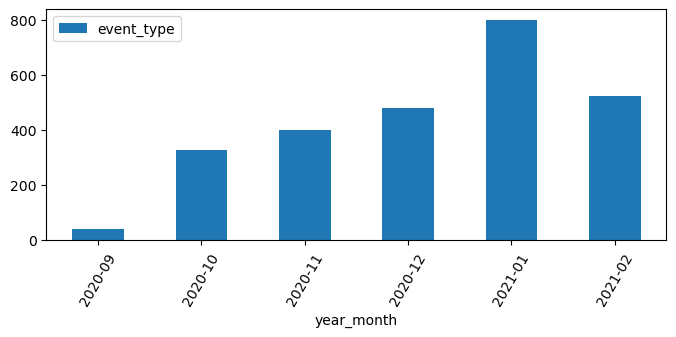

In [38]:
temp = data[data['brand']=="microsoft"][['event_type', 'year_month']].groupby(['year_month']).count()
ax = temp.plot(kind = "bar", figsize = (8, 3), rot = 60) 

<b>Back to Price:</b>

In [39]:
data.info()
# data.dtypes.nunique(), (data.dtypes=="object").sum(), (data.dtypes=="int64").sum(), (data.dtypes=="float64").sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
 9   timezone       885129 non-null  object 
 10  month          885129 non-null  int64  
 11  year           885129 non-null  int64  
 12  date           885129 non-null  object 
 13  year_month     885129 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 94.5+ MB


In [40]:
data["price"].describe()  # max is 64771 | min is 0.22 | avg is 146

count    885129.000000
mean        146.328713
std         296.807683
min           0.220000
25%          26.460000
50%          65.710000
75%         190.490000
max       64771.060000
Name: price, dtype: float64

<AxesSubplot:>

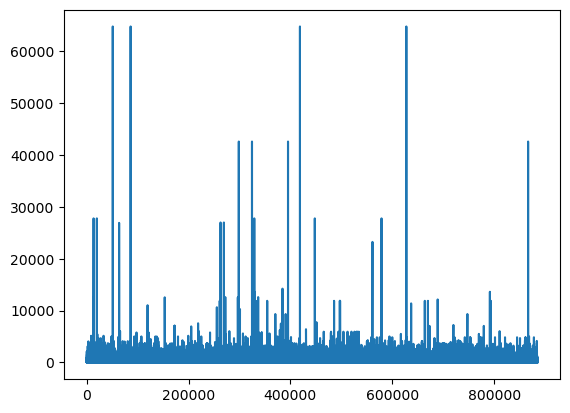

In [41]:
data["price"].plot()

In [42]:
k = data["price"] > 146
print("{:.2f}% price figures are above the mean" .format((data[k].size/data.size)*100))

30.39% price figures are above the mean


In [43]:
k = data["price"] < 146
print("{:.2f}% price figures are below the mean" .format((data[k].size/data.size)*100))

69.61% price figures are below the mean


In [44]:
mean, std = 146, 296
k = (mean-std < data["price"]) & (data["price"] < mean+std)
print("{:.2f}% price figures are within one std dev of the mean" .format((data[k].size/data.size)*100))

92.62% price figures are within one std dev of the mean


In [45]:
data[k]['price'].describe()

count    819797.000000
mean        102.187725
std         105.860623
min           0.220000
25%          24.430000
50%          58.320000
75%         144.510000
max         441.840000
Name: price, dtype: float64

In [46]:
k = data["price"] > 441
print("{:.0f} price figures are more than 1 std dev from the mean" .format(data[k].size))

920696 price figures are more than 1 std dev from the mean


In [47]:
data[k]['price'].describe()

count    65764.000000
mean       698.517863
std        846.975070
min        441.490000
25%        482.520000
50%        563.490000
75%        679.670000
max      64771.060000
Name: price, dtype: float64

<b>Creating bins based on price:</b>

In [48]:
price_dist = data[['product_id', 'price']].groupby(['price']).count().reset_index()
price_dist
# this is count of product id not product id

,price,product_id
0,0.22,8
1,0.37,207
2,0.65,1
3,0.67,3
4,0.90,138
...,...,...
12417,26909.62,1
12418,26985.35,2
12419,27775.87,5
12420,42590.13,4


In [49]:
price_dist['bin_qcut'] = pd.qcut(price_dist['price'], q = 5, precision = 1, labels=['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5'])
price_dist

,price,product_id,bin_qcut
0,0.22,8,Segment 1
1,0.37,207,Segment 1
2,0.65,1,Segment 1
3,0.67,3,Segment 1
4,0.90,138,Segment 1
...,...,...,...
12417,26909.62,1,Segment 5
12418,26985.35,2,Segment 5
12419,27775.87,5,Segment 5
12420,42590.13,4,Segment 5


In [50]:
price_dist['price'].describe()  

count    12422.000000
mean       295.970550
std       1034.540266
min          0.220000
25%         53.972500
50%        122.930000
75%        278.017500
max      64771.060000
Name: price, dtype: float64

In [51]:
labels=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
min_value = price_dist['price'].min()
max_value = price_dist['price'].max()

import numpy as np
bins = np.linspace(min_value, max_value, 6)
bins

array([2.2000000e-01, 1.2954388e+04, 2.5908556e+04, 3.8862724e+04,
       5.1816892e+04, 6.4771060e+04])

In [52]:
binss = np.linspace(min_value, max_value, 10)
binss

array([2.200000e-01, 7.196980e+03, 1.439374e+04, 2.159050e+04,
       2.878726e+04, 3.598402e+04, 4.318078e+04, 5.037754e+04,
       5.757430e+04, 6.477106e+04])

In [53]:
2.200000e-01, 7.196980e+03, 1.439374e+04, 2.159050e+04, 2.878726e+04, 3.598402e+04, 4.318078e+04, 5.037754e+04,5.757430e+04, 6.477106e+04

(0.22,
 7196.98,
 14393.74,
 21590.5,
 28787.26,
 35984.02,
 43180.78,
 50377.54,
 57574.3,
 64771.06)

In [54]:
2.2000000e-01, 1.2954388e+04, 2.5908556e+04, 3.8862724e+04,5.1816892e+04, 6.4771060e+04

(0.22, 12954.388, 25908.556, 38862.724, 51816.892, 64771.06)

In [55]:
price_dist['bins'] = pd.cut(price_dist['price'], bins=bins, labels=labels, include_lowest=True)

In [56]:
price_dist[['product_id', 'bins']].groupby(['bins']).sum()

# data[['product_id', 'price']].groupby(['price']).count().reset_index()

,product_id
bins,
Group 1,885106
Group 2,7
Group 3,8
Group 4,4
Group 5,4


In [57]:
price_dist[['product_id', 'bin_qcut']].groupby(['bin_qcut']).count()

,product_id
bin_qcut,
Segment 1,2485
Segment 2,2484
Segment 3,2484
Segment 4,2484
Segment 5,2485


In [23]:
labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]

In [24]:
price_dist['bins'] = pd.cut(price_dist['price'], bins=bins, labels=labels, include_lowest=True)

In [25]:
price_dist

,price,product_id,bins
0,0.22,8,a
1,0.37,207,a
2,0.65,1,a
3,0.67,3,a
4,0.90,138,a
...,...,...,...
12417,26909.62,1,e
12418,26985.35,2,e
12419,27775.87,5,e
12420,42590.13,4,g


(array([1.2414e+04, 3.0000e+00, 5.0000e+00]),
 array([0., 2., 4., 6.]),
 <BarContainer object of 3 artists>)

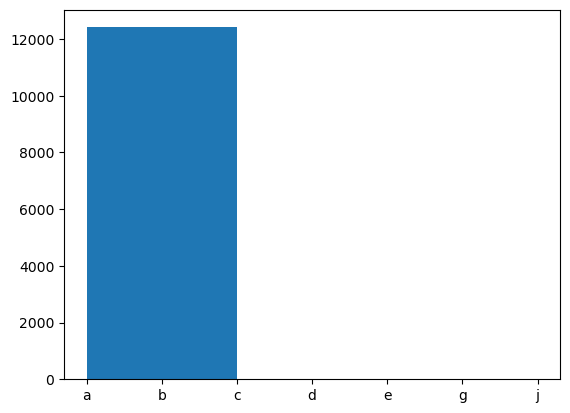

In [26]:
import matplotlib.pyplot as plt
plt.hist(price_dist['bins'], bins=3)

In [28]:
price_dist

,price,product_id,bins,bin_qcut
0,0.22,8,a,a1
1,0.37,207,a,a1
2,0.65,1,a,a1
3,0.67,3,a,a1
4,0.90,138,a,a1
...,...,...,...,...
12417,26909.62,1,e,c1
12418,26985.35,2,e,c1
12419,27775.87,5,e,c1
12420,42590.13,4,g,c1


In [14]:
data[data['price']==0.22] # can calculate number of purchases, views, cart for each price item 

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
262938,2020-11-12 04:45:56 UTC,view,327938,2144415931202273614,NaN,NaN,0.22,1515915625538189543,Zq1S1SEdsh
262939,2020-11-12 04:45:58 UTC,cart,327938,2144415931202273614,NaN,NaN,0.22,1515915625538189543,Zq1S1SEdsh
262945,2020-11-12 04:47:26 UTC,purchase,327938,2144415931202273614,NaN,NaN,0.22,1515915625538189543,Zq1S1SEdsh
270881,2020-11-13 08:52:14 UTC,view,327938,2144415931202273614,NaN,NaN,0.22,1515915625538855272,gadSEuGsQx
318202,2020-11-19 23:22:47 UTC,view,327938,2144415931202273614,NaN,NaN,0.22,1515915625541457116,14MSphXuft
677119,2021-01-25 10:26:40 UTC,view,304561,2144415931202273614,NaN,NaN,0.22,1515915625595800062,N6P8lBaBny
706703,2021-01-30 03:35:27 UTC,view,327938,2144415931202273614,NaN,NaN,0.22,1515915625598563882,qvfO1pR309
719757,2021-02-01 09:05:30 UTC,view,327938,2144415931202273614,NaN,NaN,0.22,1515915625599346902,xqxFhOIvmA


In [15]:
data[data['price']==64771.06]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
51272,2020-10-06 06:54:04 UTC,view,4170916,2144415922402623591,computers.peripherals.monitor,lg,64771.06,1515915625522796597,pfaAniPp5L
86316,2020-10-14 06:26:41 UTC,view,4170916,2144415922402623591,computers.peripherals.monitor,lg,64771.06,1515915625525406075,M91MkaVScv
418716,2020-12-09 18:31:21 UTC,view,4170916,2144415922402623591,computers.peripherals.monitor,lg,64771.06,1515915625556475919,3cyaesEFAP
627562,2021-01-17 16:43:17 UTC,view,4170916,2144415922402623591,computers.peripherals.monitor,lg,64771.06,1515915625593603786,nmfeoOLmrb


In [48]:
import numpy as np
pd.pivot_table(data, values='product_id', index=['price'], columns=['event_type'], aggfunc='count').fillna(0).sort_values(by='purchase', ascending=False).reset_index()[:10]

# Which Items are purchased the most? The one's priced at 292.83 | same analysis can be done for the product id and brand etc 

event_type,price,cart,purchase,view
0,292.83,1033.0,564.0,5492.0
1,32.22,682.0,551.0,4893.0
2,397.48,1222.0,540.0,12860.0
3,204.29,761.0,423.0,5723.0
4,1.57,528.0,407.0,3860.0
5,214.10,662.0,384.0,2866.0
6,26.19,335.0,354.0,2125.0
7,294.41,531.0,279.0,2936.0
8,9.35,294.0,261.0,2296.0
9,202.67,450.0,257.0,3004.0


<AxesSubplot:title={'center':'Price Vs Count of Views: Top 20'}, xlabel='Count of Views', ylabel='Price'>

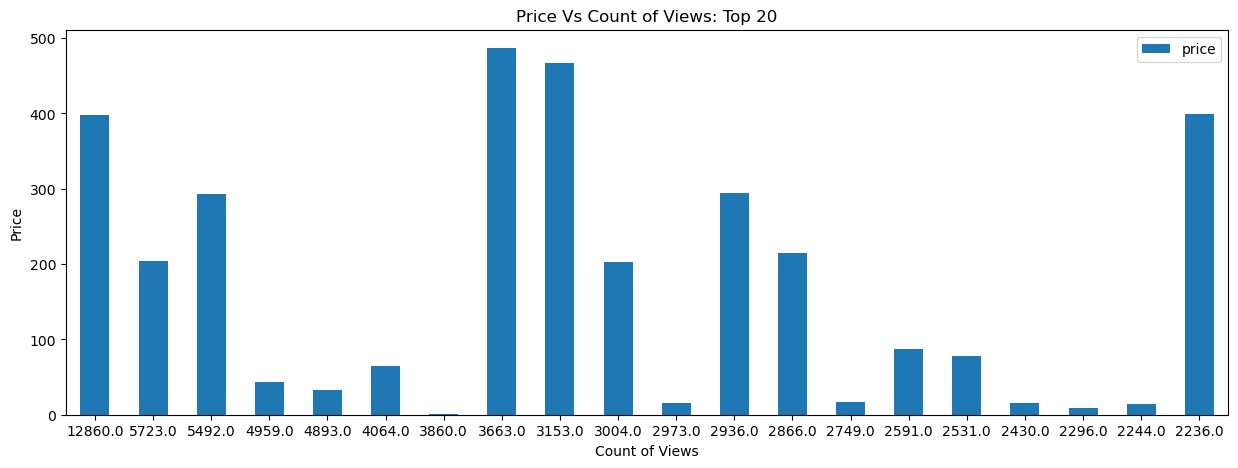

In [70]:
k1 = pd.pivot_table(data, values='product_id', index=['price'], columns=['event_type'], aggfunc='count').fillna(0).sort_values(by='view', ascending=False).reset_index()[:20]
# k1[['price', 'purchase']].plot()

k1.plot(x='view', y='price', kind = "bar", rot = 0, title = 'Price Vs Count of Views: Top 20', xlabel = 'Count of Views', ylabel = 'Price', figsize = (15, 5))

# plot(kind = "bar", rot = 0, title = "Mean Price across 6 Months", grid = True, 
#               ylabel = 'Count of Events', xlabel = 'Year', color = "slateblue")

In [68]:
k1[['price', 'purchase']]

event_type,price,purchase
0,292.83,564.0
1,32.22,551.0
2,397.48,540.0
3,204.29,423.0
4,1.57,407.0
5,214.10,384.0
6,26.19,354.0
7,294.41,279.0
8,9.35,261.0
9,202.67,257.0


<b>Brand Interaction Analysis</b>

Anothey key aspect of understanding the user interaction with the ecommerce scenario is a brand level analysis. We try to break down the brand popularity which can be explored on net interaction or views or purchases. 

In [17]:
pd.pivot_table(data, values='product_id', index=['price'], columns=['event_type'], aggfunc='count').fillna(0).sort_values(by='view', ascending=False).reset_index()[:10]

event_type,price,cart,purchase,view
0,397.48,1222.0,540.0,12860.0
1,204.29,761.0,423.0,5723.0
2,292.83,1033.0,564.0,5492.0
3,43.11,309.0,235.0,4959.0
4,32.22,682.0,551.0,4893.0
5,64.48,278.0,200.0,4064.0
6,1.57,528.0,407.0,3860.0
7,486.81,369.0,169.0,3663.0
8,466.52,314.0,149.0,3153.0
9,202.67,450.0,257.0,3004.0


In [18]:
pd.pivot_table(data, values='product_id', index=['price'], columns=['event_type'], aggfunc='count').fillna(0).sort_values(by='cart', ascending=False).reset_index()[:10]

event_type,price,cart,purchase,view
0,397.48,1222.0,540.0,12860.0
1,292.83,1033.0,564.0,5492.0
2,204.29,761.0,423.0,5723.0
3,32.22,682.0,551.0,4893.0
4,214.10,662.0,384.0,2866.0
5,294.41,531.0,279.0,2936.0
6,1.57,528.0,407.0,3860.0
7,202.67,450.0,257.0,3004.0
8,449.51,370.0,191.0,2225.0
9,486.81,369.0,169.0,3663.0


In [19]:
pd.pivot_table(data, values='product_id', index=['brand'], columns=['event_type'], aggfunc='count').fillna(0).sort_values(by='purchase', ascending=False).reset_index()[:10]

event_type,brand,cart,purchase,view
0,msi,3135.0,1788.0,19954.0
1,gigabyte,3152.0,1741.0,22780.0
2,asus,2128.0,1261.0,24317.0
3,palit,2241.0,1077.0,21484.0
4,canon,1351.0,1045.0,16042.0
5,amd,1899.0,1020.0,17191.0
6,sapphire,1440.0,917.0,8029.0
7,samsung,1029.0,758.0,21421.0
8,sirius,897.0,742.0,9770.0
9,hp,785.0,691.0,9710.0


<AxesSubplot:title={'center':'Top 5 Purchased Brands'}, xlabel='Brand', ylabel='Count of Purchase'>

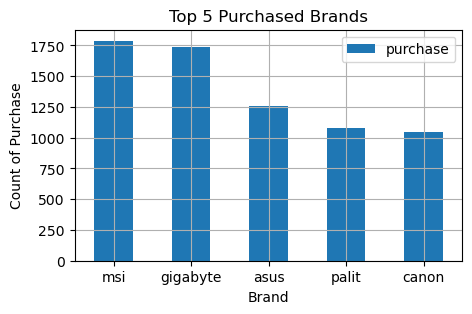

In [61]:
k2 = pd.pivot_table(data, values='product_id', index=['brand'], columns=['event_type'], aggfunc='count').fillna(0).sort_values(by='purchase', ascending=False).reset_index()[:5]
k2.plot(x='brand', y='purchase', kind = "bar", rot = 0, title = 'Top 5 Purchased Brands', xlabel = 'Brand', ylabel = 'Count of Purchase', figsize = (5, 3), grid = True)


<AxesSubplot:title={'center':'Top 20 Brands by Mean Product Price'}, xlabel='Brand', ylabel='Average Price'>

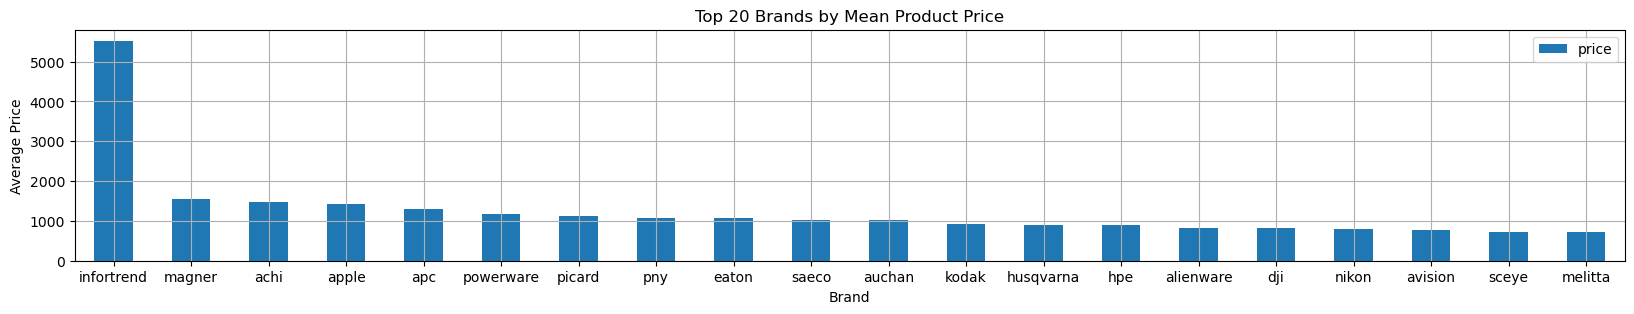

In [102]:
g1 = data[['price', 'brand']].groupby(['brand']).mean().sort_values(by='price', ascending = False).reset_index()[:20]
g1.plot(x='brand', y='price', kind = "bar", rot = 0, title = 'Top 20 Brands by Mean Product Price', xlabel = 'Brand', ylabel = 'Average Price', figsize = (20, 3), grid = True)

In [103]:
data[data['brand'] == 'infortrend']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
135159,2020-10-22 16:13:40 UTC,view,4170357,2144415973413749245,computers.peripherals.nas,infortrend,764.70,1515915625360775587,KrXdrlljvo,UTC,10,2020,2020-10-22,2020-10
451137,2020-12-16 08:23:23 UTC,view,1838848,2144415929012846868,NaN,infortrend,7774.05,1515915625563802803,nwClV1vkXs,UTC,12,2020,2020-12-16,2020-12
451139,2020-12-16 08:23:54 UTC,view,1838848,2144415929012846868,NaN,infortrend,7774.05,1515915625563802803,zFirP2OhKS,UTC,12,2020,2020-12-16,2020-12
479474,2020-12-21 14:16:28 UTC,view,1838847,2144415929012846868,NaN,infortrend,5792.83,1515915625566276310,lVHDJnl8c4,UTC,12,2020,2020-12-21,2020-12
769967,2021-02-09 07:02:07 UTC,view,4076556,2144415929012846868,NaN,infortrend,5512.65,1515915625603191000,OBtDeCpDho,UTC,2,2021,2021-02-09,2021-02


In [107]:
data[data['brand'] == 'apple']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
2098,2020-09-24 21:26:57 UTC,view,4155073,2144415922461343849,computers.notebook,apple,3138.30,1515915625519548123,A8DYBUMCUt,UTC,9,2020,2020-09-24,2020-09
4550,2020-09-25 12:12:29 UTC,view,274989,2144415924348780698,computers.notebook,apple,92.08,1515915625519711316,q6Dti3LjWQ,UTC,9,2020,2020-09-25,2020-09
4940,2020-09-25 13:52:54 UTC,view,912186,2144415922461343849,computers.notebook,apple,1089.62,1515915625519734890,DTOwmpjlz2,UTC,9,2020,2020-09-25,2020-09
5617,2020-09-25 16:55:46 UTC,view,1342603,2144415922872385653,electronics.tablet,apple,395.32,1515915625519779371,L6lCdWTb80,UTC,9,2020,2020-09-25,2020-09
6388,2020-09-25 21:45:54 UTC,view,635990,2144415948256314150,computers.peripherals.keyboard,apple,124.08,1515915625519837903,riMQhVYfnH,UTC,9,2020,2020-09-25,2020-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878275,2021-02-27 16:17:03 UTC,view,4101658,2144415922461343849,computers.notebook,apple,3717.65,1515915625610475722,wbnSpUPjip,UTC,2,2021,2021-02-27,2021-02
878965,2021-02-27 18:41:20 UTC,view,912186,2144415922461343849,computers.notebook,apple,1089.62,1515915625610523106,wYCEdBxDYk,UTC,2,2021,2021-02-27,2021-02
881944,2021-02-28 11:48:06 UTC,view,4005185,2144415922461343849,computers.notebook,apple,1828.40,1515915625597757018,Zez1tiDjl7,UTC,2,2021,2021-02-28,2021-02
882732,2021-02-28 14:21:35 UTC,view,912186,2144415922461343849,computers.notebook,apple,1089.62,1515915625610878952,D2c1Ki8eeX,UTC,2,2021,2021-02-28,2021-02


In [108]:
data[data['category_code'] == 'computers.notebook']['brand'].drop_duplicates()

294               NaN
309           pitatel
326             topon
533           palmexx
573          mobilepc
776                hp
820               top
1288        batterika
1660         dockcase
1864             asus
2080             wiwu
2098            apple
2156             alas
2203         coteetci
3091           sirius
3184         i-blason
3471           lenovo
3538             acer
5654            crown
9426            trust
10172     cameronsino
14875            sony
18474            dell
19314            hama
23126           heddy
23934            buro
40411            riva
55507         samsung
57870           remax
65275             msi
67874       tripplite
70865          baseus
71388          targus
85573       panasonic
87991          orient
92128             ncl
154421      jisoncase
186050         espada
193456       fellowes
236860         perfeo
296104           vcom
315953         ginzzu
348436          urban
Name: brand, dtype: object

In [106]:
data[data['category_code'] == 'computers.peripherals.nas']['brand'].drop_duplicates()

75             zyxel
4517        synology
25904           qnap
28211            NaN
97950        asustor
135159    infortrend
Name: brand, dtype: object

<AxesSubplot:title={'center':'Top 20 Viewed Brands'}, xlabel='Brand', ylabel='Count of Views'>

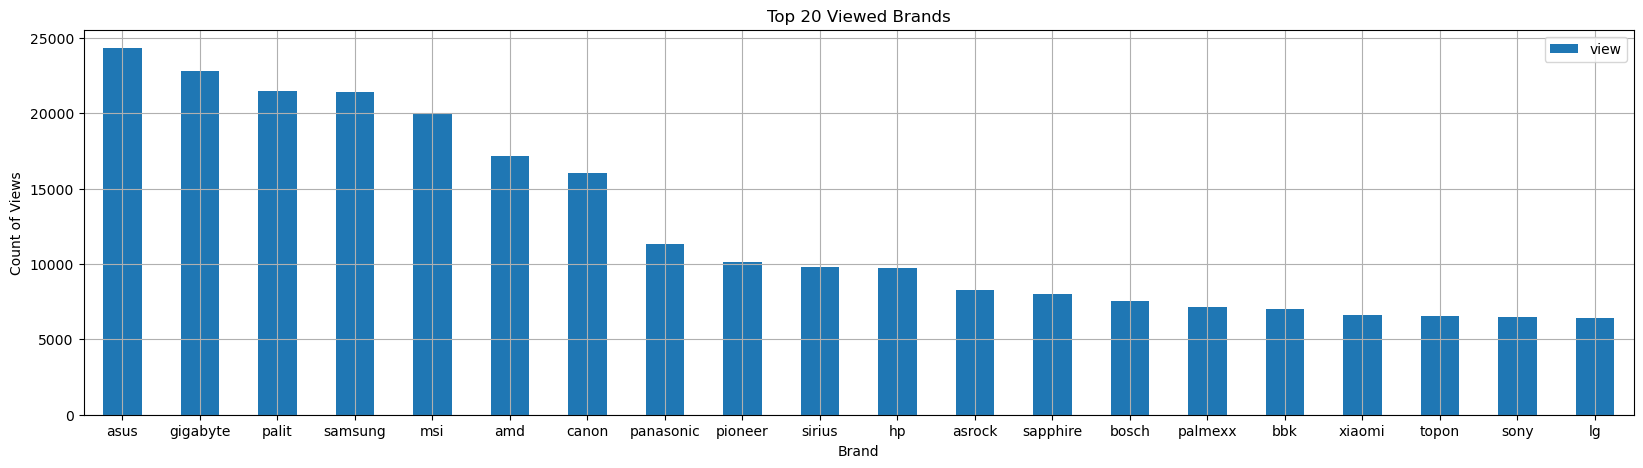

In [84]:
k3 = pd.pivot_table(data, values='product_id', index=['brand'], columns=['event_type'], aggfunc='count').fillna(0).sort_values(by='view', ascending=False).reset_index()[:20]
k3.plot(x='brand', y='view', kind = "bar", rot = 0, title = 'Top 20 Viewed Brands', xlabel = 'Brand', ylabel = 'Count of Views', figsize = (20, 5), grid = True)

In [21]:
pd.pivot_table(data, values='product_id', index=['brand'], columns=['event_type'], aggfunc='count').fillna(0).sort_values(by='cart', ascending=False).reset_index()[:10]


# can do a brands by price analysis also 

event_type,brand,cart,purchase,view
0,gigabyte,3152.0,1741.0,22780.0
1,msi,3135.0,1788.0,19954.0
2,palit,2241.0,1077.0,21484.0
3,asus,2128.0,1261.0,24317.0
4,amd,1899.0,1020.0,17191.0
5,sapphire,1440.0,917.0,8029.0
6,canon,1351.0,1045.0,16042.0
7,samsung,1029.0,758.0,21421.0
8,sirius,897.0,742.0,9770.0
9,asrock,871.0,523.0,8248.0


In [22]:
pd.pivot_table(data, values='product_id', index=['category_code'], columns=['event_type'], aggfunc='count').fillna(0).sort_values(by='purchase', ascending=False).reset_index()[:10]

event_type,category_code,cart,purchase,view
0,computers.components.videocards,12684.0,6888.0,97145.0
1,electronics.telephone,5387.0,4119.0,74854.0
2,stationery.cartrige,3041.0,2739.0,32945.0
3,computers.peripherals.printer,3183.0,2557.0,37484.0
4,computers.notebook,1515.0,1297.0,22220.0
5,computers.components.motherboard,2113.0,1266.0,23225.0
6,computers.components.cpu,2241.0,1213.0,21319.0
7,electronics.audio.acoustic,1140.0,848.0,24778.0
8,electronics.tablet,1084.0,819.0,17479.0
9,auto.accessories.player,880.0,685.0,15936.0


In [115]:
pd.pivot_table(data, values='product_id', index=['brand'], columns=['event_type'], aggfunc='count').fillna(0).sort_values(by='purchase', ascending=False).reset_index()[30:40]

event_type,brand,cart,purchase,view
30,fubag,228.0,194.0,2578.0
31,zalman,269.0,184.0,3768.0
32,cameronsino,209.0,177.0,5228.0
33,bbk,291.0,176.0,6992.0
34,pocketbook,227.0,175.0,2912.0
35,kitfort,225.0,169.0,5994.0
36,xiaomi,347.0,165.0,6620.0
37,microsoft,229.0,150.0,2193.0
38,xerox,179.0,148.0,2497.0
39,kenwood,167.0,148.0,2365.0


In [23]:
data.nunique()

event_time       845041
event_type            3
product_id        53453
category_id         718
category_code       107
brand               999
price             12422
user_id          407283
user_session     490398
dtype: int64

In [24]:
data['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [25]:
temp01 = data[data['category_code']=='electronics.telephone']
temp01.nunique()

event_time       83741
event_type           3
product_id        6731
category_id         31
category_code        1
brand              127
price             1495
user_id          43903
user_session     50635
dtype: int64

In [26]:
temp02 = temp01[temp01['event_type']=='purchase']
temp02.nunique()

event_time       3967
event_type          1
product_id        822
category_id        22
category_code       1
brand              56
price             374
user_id          2559
user_session     2875
dtype: int64

<b>Understanding the User Journey at a drilled down level:</b>

In [27]:
temp02[temp02['user_id']==1515915625610926750]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
883739,2021-02-28 17:38:21 UTC,purchase,347221,2144415922587172973,electronics.telephone,NaN,9.37,1515915625610926750,a578qSiQHz
883754,2021-02-28 17:40:44 UTC,purchase,347221,2144415922587172973,electronics.telephone,NaN,9.37,1515915625610926750,a578qSiQHz


In [28]:
temp02[temp02['user_id']==1515915625610973497]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
884197,2021-02-28 19:15:55 UTC,purchase,3828041,2144415922587172973,electronics.telephone,NaN,12.22,1515915625610973497,iZZvir6gd7


In [29]:
temp02[temp02['user_id']==1515915625610973497]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
884197,2021-02-28 19:15:55 UTC,purchase,3828041,2144415922587172973,electronics.telephone,NaN,12.22,1515915625610973497,iZZvir6gd7


In [30]:
temp02[temp02['product_id']==828590]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
484,2020-09-24 13:43:24 UTC,purchase,828590,2144415922528452715,electronics.telephone,sirius,20.79,1515915625519426806,X4Dcts4iVJ
494,2020-09-24 13:46:02 UTC,purchase,828590,2144415922528452715,electronics.telephone,sirius,20.79,1515915625519427738,ahwj2FCrvS


In [31]:
temp02[temp02['brand']=="sirius"]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
484,2020-09-24 13:43:24 UTC,purchase,828590,2144415922528452715,electronics.telephone,sirius,20.79,1515915625519426806,X4Dcts4iVJ
494,2020-09-24 13:46:02 UTC,purchase,828590,2144415922528452715,electronics.telephone,sirius,20.79,1515915625519427738,ahwj2FCrvS
811,2020-09-24 15:08:48 UTC,purchase,3828207,2144415922528452715,electronics.telephone,sirius,19.43,1515915625519454753,WOTSAlnDAf
821,2020-09-24 15:10:15 UTC,purchase,3828207,2144415922528452715,electronics.telephone,sirius,19.43,1515915625519454753,WOTSAlnDAf
972,2020-09-24 15:48:48 UTC,purchase,3755038,2144415922528452715,electronics.telephone,sirius,23.48,1515915625519470141,MoSEKzHf8x
...,...,...,...,...,...,...,...,...,...
874604,2021-02-26 21:22:42 UTC,purchase,1821560,2144415922528452715,electronics.telephone,sirius,20.16,1515915625610152683,Y0l76cBROr
877614,2021-02-27 13:36:19 UTC,purchase,1745073,2144415922528452715,electronics.telephone,sirius,22.62,1515915625610421345,lqJe1IXjKY
881720,2021-02-28 11:03:28 UTC,purchase,4013582,2144415922528452715,electronics.telephone,sirius,26.98,1515915625610798706,MyiYHkQFQR
882876,2021-02-28 14:53:25 UTC,purchase,852709,2144415922553618540,electronics.telephone,sirius,11.51,1515915625610864624,uQ6SP7QmuV


In [32]:
# date wise splitting 
# group for user session
# create some questions, find answers to that 

<b>Diving into Brand: Microsoft</b>

In [124]:
cond = data['brand'] == 'microsoft'  
data_ms = data[cond]
data_ms.sample(20)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
880797,2021-02-28 07:41:37 UTC,cart,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625610452706,xvKOKvJ2Hz,UTC,2,2021,2021-02-28,2021-02
705346,2021-01-29 18:20:32 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
444138,2020-12-14 20:52:24 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625563189477,hBbRThtN3D,UTC,12,2020,2020-12-14,2020-12
568804,2021-01-08 14:45:10 UTC,purchase,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625577496771,20wGz1y3S7,UTC,1,2021,2021-01-08,2021-01
43675,2020-10-04 13:56:51 UTC,view,4100513,2144415922050302046,NaN,microsoft,592.08,1515915625522323029,rLWLgIEy2r,UTC,10,2020,2020-10-04,2020-10
709835,2021-01-30 15:15:15 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-30,2021-01
438235,2020-12-13 19:32:15 UTC,view,236783,2144415948222759717,computers.peripherals.mouse,microsoft,55.08,1515915625562256503,mvkfEE1225,UTC,12,2020,2020-12-13,2020-12
207702,2020-11-03 18:56:06 UTC,view,1745817,2144415922050302046,NaN,microsoft,365.41,1515915625534268893,4d1YGnD2n5,UTC,11,2020,2020-11-03,2020-11
850170,2021-02-22 13:40:42 UTC,purchase,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625608456793,7qriaRXG9h,UTC,2,2021,2021-02-22,2021-02
149763,2020-10-25 10:28:28 UTC,view,225879,2144415922360680550,computers.peripherals.camera,microsoft,34.30,1515915625530283294,FFo6eZ6JBz,UTC,10,2020,2020-10-25,2020-10


In [126]:
data_ms['user_session'].nunique(), data_ms['user_session'].count()

# finding out the most affecting variable for purchase decision --> classification where purcahse is your 
# predicting the time to purchase 
# day of week, time of day 

# next user will buy what 

(1508, 2571)

In [164]:
items = data_ms.user_session.value_counts().to_dict().items() # I am filtering for mutiple occurences of a user session & then looking whether it converts to buying or not
data_fil = data_ms[data_ms.user_session.isin([key for key, val in items if val > 1])]

In [204]:
data_ms.user_session.value_counts()

yFupuoxDXo    27
TBy3ZSkvYj    27
odx6xQ4sDA    22
OCP0Vpb3Q1    20
yrUEZ4qjqB    16
              ..
pRdSSXWiEZ     1
ouGKM85Iuq     1
Tg0hAiRqvj     1
NzsxiKZq03     1
PUxd4dPSIa     1
Name: user_session, Length: 1508, dtype: int64

In [167]:
data_fil2 = data_ms[data_ms.user_session.isin([key for key, val in items if val == 1])] # 1 user session

In [171]:
next(iter(items))

('yFupuoxDXo', 27)

In [176]:
final_filter = data_ms['user_session'] == 'yFupuoxDXo'  # we are just seeing what this user is basically doing in the sessions 
data_ms[final_filter]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month,new
624934,2021-01-17 09:26:57 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01,NaN
624948,2021-01-17 09:28:51 UTC,view,1613600,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01,NaN
624967,2021-01-17 09:34:01 UTC,cart,1613600,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01,NaN
624970,2021-01-17 09:34:38 UTC,view,1613600,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01,NaN
626553,2021-01-17 14:09:22 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01,NaN
626559,2021-01-17 14:09:56 UTC,view,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01,NaN
626562,2021-01-17 14:10:49 UTC,view,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01,NaN
627205,2021-01-17 15:45:15 UTC,cart,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01,NaN
627219,2021-01-17 15:47:04 UTC,purchase,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01,NaN
627225,2021-01-17 15:48:31 UTC,purchase,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01,NaN


In [190]:
data[data['user_id'] == 1515915625564612174]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
460550,2020-12-18 01:15:49 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625564612174,JzqtXWBWx8,UTC,12,2020,2020-12-18,2020-12
624934,2021-01-17 09:26:57 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
624948,2021-01-17 09:28:51 UTC,view,1613600,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
624967,2021-01-17 09:34:01 UTC,cart,1613600,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
624970,2021-01-17 09:34:38 UTC,view,1613600,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
626553,2021-01-17 14:09:22 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
626559,2021-01-17 14:09:56 UTC,view,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
626562,2021-01-17 14:10:49 UTC,view,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
627205,2021-01-17 15:45:15 UTC,cart,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
627219,2021-01-17 15:47:04 UTC,purchase,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01


In [179]:
data[data['user_session'] == 'yFupuoxDXo']  # this person is purchasing same item multiple times, could be a mass ordering shop sort of thing

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
624934,2021-01-17 09:26:57 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
624948,2021-01-17 09:28:51 UTC,view,1613600,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
624967,2021-01-17 09:34:01 UTC,cart,1613600,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
624970,2021-01-17 09:34:38 UTC,view,1613600,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
626553,2021-01-17 14:09:22 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
626559,2021-01-17 14:09:56 UTC,view,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
626562,2021-01-17 14:10:49 UTC,view,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
627205,2021-01-17 15:45:15 UTC,cart,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
627219,2021-01-17 15:47:04 UTC,purchase,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01
627225,2021-01-17 15:48:31 UTC,purchase,1651969,2144415922050302046,NaN,microsoft,365.41,1515915625564612174,yFupuoxDXo,UTC,1,2021,2021-01-17,2021-01


In [188]:
# brand = microsoft, category_code = NaN, category_id = 2144415922050302046, user_session = yFupuoxDXo 
block = data_ms[final_filter].drop(['category_code', 'user_session', 'timezone', 'new', 'brand'], axis = 1)

In [189]:
block

,event_time,event_type,product_id,category_id,price,user_id,month,year,date,year_month
624934,2021-01-17 09:26:57 UTC,view,4031353,2144415922050302046,284.46,1515915625564612174,1,2021,2021-01-17,2021-01
624948,2021-01-17 09:28:51 UTC,view,1613600,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
624967,2021-01-17 09:34:01 UTC,cart,1613600,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
624970,2021-01-17 09:34:38 UTC,view,1613600,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
626553,2021-01-17 14:09:22 UTC,view,4031353,2144415922050302046,284.46,1515915625564612174,1,2021,2021-01-17,2021-01
626559,2021-01-17 14:09:56 UTC,view,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
626562,2021-01-17 14:10:49 UTC,view,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627205,2021-01-17 15:45:15 UTC,cart,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627219,2021-01-17 15:47:04 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627225,2021-01-17 15:48:31 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01


In [192]:
block[block['event_type'] == 'purchase']

,event_time,event_type,product_id,category_id,price,user_id,month,year,date,year_month
627219,2021-01-17 15:47:04 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627225,2021-01-17 15:48:31 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627228,2021-01-17 15:48:41 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627229,2021-01-17 15:49:04 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
669778,2021-01-24 08:08:12 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-24,2021-01
726891,2021-02-02 09:43:22 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,2,2021,2021-02-02,2021-02


In [193]:
block[block['product_id']==1651969]

,event_time,event_type,product_id,category_id,price,user_id,month,year,date,year_month
626559,2021-01-17 14:09:56 UTC,view,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
626562,2021-01-17 14:10:49 UTC,view,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627205,2021-01-17 15:45:15 UTC,cart,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627219,2021-01-17 15:47:04 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627225,2021-01-17 15:48:31 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627228,2021-01-17 15:48:41 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
627229,2021-01-17 15:49:04 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-17,2021-01
669775,2021-01-24 08:07:48 UTC,view,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-24,2021-01
669776,2021-01-24 08:07:52 UTC,cart,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-24,2021-01
669778,2021-01-24 08:08:12 UTC,purchase,1651969,2144415922050302046,365.41,1515915625564612174,1,2021,2021-01-24,2021-01


In [197]:
data[data['user_session'] == 'TBy3ZSkvYj']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
703732,2021-01-29 13:25:02 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
703756,2021-01-29 13:29:09 UTC,cart,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
703758,2021-01-29 13:29:17 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
703776,2021-01-29 13:31:18 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
703803,2021-01-29 13:36:21 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
704447,2021-01-29 15:38:58 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
704452,2021-01-29 15:39:50 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
705162,2021-01-29 17:45:38 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
705175,2021-01-29 17:48:22 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
705188,2021-01-29 17:49:40 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01


In [198]:
data[data['user_id']==1515915625598386111]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
703732,2021-01-29 13:25:02 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
703756,2021-01-29 13:29:09 UTC,cart,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
703758,2021-01-29 13:29:17 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
703776,2021-01-29 13:31:18 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
703803,2021-01-29 13:36:21 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
704447,2021-01-29 15:38:58 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
704452,2021-01-29 15:39:50 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
705162,2021-01-29 17:45:38 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
705175,2021-01-29 17:48:22 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01
705188,2021-01-29 17:49:40 UTC,view,4031353,2144415922050302046,NaN,microsoft,284.46,1515915625598386111,TBy3ZSkvYj,UTC,1,2021,2021-01-29,2021-01


In [199]:
items

dict_items([('yFupuoxDXo', 27), ('TBy3ZSkvYj', 27), ('odx6xQ4sDA', 22), ('OCP0Vpb3Q1', 20), ('yrUEZ4qjqB', 16), ('7KTeFVLNlp', 14), ('9vA4prnkEK', 14), ('5JLDvzMoUQ', 14), ('E4d5qhGm2h', 13), ('njAdk9tXmH', 10), ('20wGz1y3S7', 10), ('n1vC2IXx5g', 10), ('pjzZtbheNe', 10), ('O4KhrZkYY0', 10), ('MNB4Xjdr7P', 9), ('IMhOI4t0p7', 9), ('NmRY0Ayf9g', 9), ('5hqo6zU7sR', 9), ('AbDF7kix1w', 9), ('gYxkXkANCA', 8), ('xvKOKvJ2Hz', 8), ('NBypppLUOW', 8), ('E3MesSjPze', 8), ('LFPhKoYfgW', 8), ('CqG1uggIo8', 8), ('XHMF1mgSXQ', 7), ('Hg5GFUyO6I', 7), ('pjIEqXF5dy', 7), ('FFo6eZ6JBz', 7), ('LQGGquCjw2', 7), ('yRZO5EsSna', 7), ('uxlkfBGXiS', 7), ('cWlqBhIIFw', 7), ('a5F5YIcl8L', 7), ('sU2I1Vc4RX', 7), ('QG3QYNxzh0', 6), ('SrLWegzfXC', 6), ('j9SnUcjv7N', 6), ('7uFmWgcpFn', 6), ('jMtsHOVB7h', 6), ('ojvAdUKN89', 6), ('tTgJxA2vJX', 6), ('PAjTyWHCOo', 6), ('vrIauTXzEa', 6), ('cBHDZzilHs', 6), ('LTAElRbWY9', 6), ('tDKuV59PjJ', 6), ('hQdrzCYXUs', 6), ('o9LKlBb7Sv', 6), ('FsL6INvoIr', 6), ('JZH613FSAi', 6), ('vbS

In [200]:
data[data['user_session']=='Uq8x2Ko67L']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
70593,2020-10-10 14:26:00 UTC,view,1745817,2144415922050302046,NaN,microsoft,365.41,1515915625524404112,Uq8x2Ko67L,UTC,10,2020,2020-10-10,2020-10
70596,2020-10-10 14:26:09 UTC,view,3829446,2144415922050302046,NaN,microsoft,284.46,1515915625524404112,Uq8x2Ko67L,UTC,10,2020,2020-10-10,2020-10
70599,2020-10-10 14:26:45 UTC,view,3556417,2144415922050302046,NaN,microsoft,365.41,1515915625524404112,Uq8x2Ko67L,UTC,10,2020,2020-10-10,2020-10
70616,2020-10-10 14:30:32 UTC,view,4029736,2144415922050302046,NaN,microsoft,590.46,1515915625524404112,Uq8x2Ko67L,UTC,10,2020,2020-10-10,2020-10


In [201]:
data[data['user_id']==1515915625524404112]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
70593,2020-10-10 14:26:00 UTC,view,1745817,2144415922050302046,NaN,microsoft,365.41,1515915625524404112,Uq8x2Ko67L,UTC,10,2020,2020-10-10,2020-10
70596,2020-10-10 14:26:09 UTC,view,3829446,2144415922050302046,NaN,microsoft,284.46,1515915625524404112,Uq8x2Ko67L,UTC,10,2020,2020-10-10,2020-10
70599,2020-10-10 14:26:45 UTC,view,3556417,2144415922050302046,NaN,microsoft,365.41,1515915625524404112,Uq8x2Ko67L,UTC,10,2020,2020-10-10,2020-10
70616,2020-10-10 14:30:32 UTC,view,4029736,2144415922050302046,NaN,microsoft,590.46,1515915625524404112,Uq8x2Ko67L,UTC,10,2020,2020-10-10,2020-10
74272,2020-10-11 13:08:52 UTC,view,4044607,2144415922050302046,NaN,microsoft,358.49,1515915625524404112,FaiD0QXPMP,UTC,10,2020,2020-10-11,2020-10


<b>Diving into Brand: Asus</b>

In [208]:
cond = data['brand'] == 'asus'  
data_asus = data[cond]
data_asus.sample(20)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
435459,2020-12-13 10:39:51 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-13,2020-12
710324,2021-01-30 16:42:02 UTC,purchase,4101537,2144415922427789416,computers.components.videocards,asus,307.43,1515915625598787120,8B1m8fughy,UTC,1,2021,2021-01-30,2021-01
334111,2020-11-22 10:42:37 UTC,view,840623,2144415924491387038,computers.components.motherboard,asus,82.33,1515915625542367846,gzKQpLvdup,UTC,11,2020,2020-11-22,2020-11
803673,2021-02-14 15:55:14 UTC,view,387952,2144415922427789416,computers.components.videocards,asus,64.48,1515915625605472928,tePnY7UTqH,UTC,2,2021,2021-02-14,2021-02
847322,2021-02-22 03:33:53 UTC,view,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625608280291,02bsPxxtYr,UTC,2,2021,2021-02-22,2021-02
263352,2020-11-12 06:12:05 UTC,view,137302,2144415924491387038,computers.components.motherboard,asus,55.16,1515915625538420183,TrRkMjnxVe,UTC,11,2020,2020-11-12,2020-11
92730,2020-10-15 12:28:09 UTC,view,387956,2144415922427789416,computers.components.videocards,asus,104.21,1515915625526352524,rh0VbMgW7l,UTC,10,2020,2020-10-15,2020-10
303615,2020-11-18 03:47:32 UTC,view,608924,2144415924491387038,computers.components.motherboard,asus,65.19,1515915625538837330,4tJoGnSyiX,UTC,11,2020,2020-11-18,2020-11
660693,2021-01-22 15:05:09 UTC,view,809948,2144415924491387038,computers.components.motherboard,asus,64.48,1515915625595962542,g2Sx8f0yFr,UTC,1,2021,2021-01-22,2021-01
182817,2020-10-30 16:16:52 UTC,view,4078917,2144415922427789416,computers.components.videocards,asus,453.86,1515915625532047199,i82LZw3zf8,UTC,10,2020,2020-10-30,2020-10


In [209]:
data[data['user_id'] == 1515915625561716811]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
432317,2020-12-12 17:18:44 UTC,view,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-12,2020-12
432322,2020-12-12 17:19:35 UTC,cart,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-12,2020-12
432325,2020-12-12 17:20:06 UTC,view,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-12,2020-12
432332,2020-12-12 17:21:23 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-12,2020-12
435439,2020-12-13 10:37:57 UTC,view,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-13,2020-12
435442,2020-12-13 10:38:18 UTC,view,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-13,2020-12
435443,2020-12-13 10:38:23 UTC,view,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-13,2020-12
435445,2020-12-13 10:38:37 UTC,view,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-13,2020-12
435450,2020-12-13 10:39:01 UTC,cart,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-13,2020-12
435459,2020-12-13 10:39:51 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-13,2020-12


In [212]:
data[data['product_id'] == 3721154][data['event_type'] == 'purchase'] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
43718,2020-10-04 14:03:39 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625522324063,HEShkwTqm0,UTC,10,2020,2020-10-04,2020-10
43725,2020-10-04 14:04:57 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625522324063,HEShkwTqm0,UTC,10,2020,2020-10-04,2020-10
52914,2020-10-06 12:24:22 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625521086565,F41r61pbYV,UTC,10,2020,2020-10-06,2020-10
53292,2020-10-06 13:38:27 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625521086565,F41r61pbYV,UTC,10,2020,2020-10-06,2020-10
56452,2020-10-07 08:40:30 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625523141564,ANvlphq9Fh,UTC,10,2020,2020-10-07,2020-10
58441,2020-10-07 16:13:57 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625523269579,HjgzeS5J3I,UTC,10,2020,2020-10-07,2020-10
63257,2020-10-08 17:15:40 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625523691985,3NaGgkMQfg,UTC,10,2020,2020-10-08,2020-10
142014,2020-10-23 19:24:02 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625529404025,zvJlJ00SB6,UTC,10,2020,2020-10-23,2020-10
432332,2020-12-12 17:21:23 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-12,2020-12
435459,2020-12-13 10:39:51 UTC,purchase,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625561716811,iYqRYvcht4,UTC,12,2020,2020-12-13,2020-12


In [214]:
data[data['category_id'] == 2144415922016747613].sample(20)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,timezone,month,year,date,year_month
869254,2021-02-26 01:52:10 UTC,view,3506321,2144415922016747613,computers.peripherals.wifi,perfeo,11.86,1515915625609663061,2tROYTE4RE,UTC,2,2021,2021-02-26,2021-02
90876,2020-10-15 06:08:45 UTC,purchase,1400398,2144415922016747613,computers.peripherals.wifi,keenetic,50.63,1515915625526217902,ATM7cIv0Ii,UTC,10,2020,2020-10-15,2020-10
534043,2021-01-01 22:44:18 UTC,view,3790867,2144415922016747613,computers.peripherals.wifi,zyxel,57.13,1515915625571711728,x2TNT9TMdJ,UTC,1,2021,2021-01-01,2021-01
646630,2021-01-20 11:53:31 UTC,view,846904,2144415922016747613,computers.peripherals.wifi,huawei,149.05,1515915625595170902,yzlIqKoByu,UTC,1,2021,2021-01-20,2021-01
833024,2021-02-19 12:12:15 UTC,view,1149280,2144415922016747613,computers.peripherals.wifi,zyxel,334.90,1515915625600941558,x5c92DMGgB,UTC,2,2021,2021-02-19,2021-02
3073,2020-09-25 07:03:33 UTC,view,217916,2144415922016747613,computers.peripherals.wifi,d-link,26.57,1515915625519623979,VuYou6b8R3,UTC,9,2020,2020-09-25,2020-09
141961,2020-10-23 19:16:25 UTC,view,3721154,2144415922016747613,computers.peripherals.wifi,asus,327.43,1515915625529404025,GlauJE5Lhs,UTC,10,2020,2020-10-23,2020-10
329994,2020-11-21 17:41:00 UTC,purchase,947195,2144415922016747613,computers.peripherals.wifi,xiaomi,53.24,1515915625542093913,LFlvtifKoO,UTC,11,2020,2020-11-21,2020-11
275448,2020-11-13 22:45:49 UTC,view,879669,2144415922016747613,computers.peripherals.wifi,tp-link,99.46,1515915625539109493,OfS66aAEXb,UTC,11,2020,2020-11-13,2020-11
274327,2020-11-13 18:20:59 UTC,view,1379003,2144415922016747613,computers.peripherals.wifi,tp-link,95.08,1515915625539048534,zEMVjIQnpO,UTC,11,2020,2020-11-13,2020-11


In [221]:
okay = data[['product_id', 'user_session']].groupby("user_session").count().reset_index()
okay.sample(10)

,user_session,product_id
309326,d0caVqJ71n,1
282489,Zdpx1G8hwK,1
274935,Yf7sk6dsGu,1
384167,mWA4yYvjaI,6
93700,BfyQfPHgba,1
468661,xGKp6yWFxP,1
183993,N81zqIphee,3
50005,6DgNy6Lcf7,1
439240,tWT1i95jlP,1
410152,poeQgnIEGP,1


In [223]:
okay[okay['product_id']>1] # these users are looking at mutiple products 

,user_session,product_id
3,001P7lK0Pt,2
7,003pEktS1X,2
13,005wDfXQrv,2
15,00735945-0395-48db-967c-59418c0ddb89,2
22,009zFA5YxX,8
...,...,...
490382,zztRHEozV0,3
490384,zztce59nU2,9
490388,zzveLpjyyb,5
490391,zzx67A1jBp,5


In [226]:
okay.sort_values(by='product_id', ascending=False)

,user_session,product_id
390012,nFlhu5QzOd,572
74756,9HqvxzKlPb,424
120869,F6ohHpTTBU,293
351905,iP9cILMFNS,260
93531,BejOXRngEW,215
...,...,...
190949,O083csoWqs,1
190946,O06Nh3RgSV,1
190945,O06Bicj0I6,1
190944,O05Z8kvR3B,1


In [232]:
okay2 = data[data['user_session']=="nFlhu5QzOd"]
okay2.nunique().sort_values() # this person is just  vieweing not buying not adding to cart 9 --> probably tracking price of some items 

event_type         1
category_id        1
category_code      1
user_id            1
user_session       1
timezone           1
brand              2
year               2
month              3
year_month         3
product_id         9
price              9
date              48
event_time       569
dtype: int64